# Image Multiclass Classification - Convolutional Deep Neural Network (CNN) 

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*In this work, an image multiclass classification example is presented by use of a Deep Convolutional Neural Network. The dataset consists of  images that belong to six classes ('buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5) and they are split into training, test and prediction images with each sample set being grouped on a separate folder. The scope of this project is to a) fit the  model to the train_images, b) use test_images for validation and c) make class predictions on 'new' images.*

*In the first part of this demonstration, the paths to all image folders are provided as the train and test folder images have to be further grouped in sub-directories based on the class that they belong to. The samples of the prediction folder just need to be sub-grouped all together as they are the 'new' images whose classes are to be predicted. The second part of this work includes all the neccessary data preparation / preprocessing. The shape of the images, that are to be passed into the deep learning model, is selected and there is use of the image data generator (Tensorflow-Keras) to provide real time image augmentation and transformation to improve the efficiency of the training process. In the third part, the deep learning model is created by use of Tensorflow Keras Models (Sequential) and Layers (Dense,Conv2D,MaxPool2D,Dropout,Flatten), whereas in the fourth part, CNN training is presented and model performance is evaluated based on metrics such as classification report and confusion matrix (sklearn). Finally, examples of  image classification of individual test images and individual / all 'new' images are provided.*




**The Dataset (.jpg image format) for this project has been obtained from Kaggle:**

"*Intel Image Classification - Image Scene Classification of Multiclass*" -- Files: "seg_train, seg_test,seg_pred"  Source:https://www.kaggle.com/puneet6060/intel-image-classification



## Loading the train, test & prediction images from folders

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Path to the folder that comprises the train, test and pred images 
img_directory= 'C:\\Users\\geoto\\Desktop\\Int_Img_Class'
print(os.listdir(img_directory))

['seg_pred', 'seg_test', 'seg_train']


In [3]:
# Path to the relevant train,test,pred folders
train_folder= img_directory+ '\\seg_train\\'
test_folder= img_directory+ '\\seg_test\\'
pred_folder= img_directory+ '\\seg_pred\\'
print(train_folder)
print(test_folder)
print(pred_folder)

C:\Users\geoto\Desktop\Int_Img_Class\seg_train\
C:\Users\geoto\Desktop\Int_Img_Class\seg_test\
C:\Users\geoto\Desktop\Int_Img_Class\seg_pred\


In [4]:
# Image classes in train folder 
os.listdir(train_folder)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [5]:
# First 10 images of 'Buildings' in train folder
os.listdir(train_folder+ 'buildings')[:10]

['0.jpg',
 '10006.jpg',
 '1001.jpg',
 '10014.jpg',
 '10018.jpg',
 '10029.jpg',
 '10032.jpg',
 '10056.jpg',
 '1009.jpg',
 '10113.jpg']

In [6]:
# First 'Building' image(array)
first_build_image=train_folder+ 'buildings\\'+'0.jpg'
print(imread(first_build_image))

[[[247 247 245]
  [247 247 245]
  [248 248 246]
  ...
  [248 248 248]
  [247 247 245]
  [247 247 245]]

 [[246 246 244]
  [247 247 245]
  [247 247 245]
  ...
  [248 248 248]
  [247 247 245]
  [247 247 245]]

 [[246 246 244]
  [246 246 244]
  [247 247 245]
  ...
  [248 248 248]
  [247 247 245]
  [247 247 245]]

 ...

 [[ 47  46  44]
  [ 62  61  59]
  [ 49  48  46]
  ...
  [ 51  46  43]
  [ 45  40  37]
  [ 94  89  86]]

 [[ 77  76  74]
  [ 47  46  44]
  [ 43  42  40]
  ...
  [ 22  17  14]
  [ 55  50  47]
  [ 39  34  31]]

 [[ 59  58  56]
  [ 55  54  52]
  [ 60  59  57]
  ...
  [ 31  26  23]
  [ 51  46  43]
  [ 63  58  55]]]


In [7]:
# Shape of First 'Building' image
imread(first_build_image).shape

(150, 150, 3)

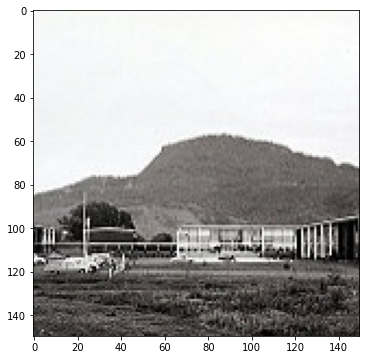

In [8]:
# Use of plt.imshow to view the image
plt.figure(figsize=(10,6))
plt.imshow(imread(first_build_image))
plt.show()

In [9]:
# First 'forest' image
os.listdir(train_folder+'forest')[0]

'10007.jpg'

In [10]:
# First 'forest' image (array)
first_forest_image=(train_folder + 'forest\\'+'10007.jpg')
imread(first_forest_image)

array([[[ 30,  34,  11],
        [ 24,  27,  10],
        [ 35,  37,  24],
        ...,
        [137, 164,  95],
        [114, 140,  79],
        [ 77, 104,  51]],

       [[ 16,  19,   0],
        [ 27,  30,  13],
        [ 35,  37,  24],
        ...,
        [ 94, 115,  48],
        [182, 203, 144],
        [188, 208, 157]],

       [[ 24,  27,   6],
        [ 49,  52,  35],
        [ 23,  25,  12],
        ...,
        [107, 123,  61],
        [152, 169, 115],
        [135, 151, 106]],

       ...,

       [[ 61,  54,  36],
        [  9,   3,   0],
        [ 75,  72,  41],
        ...,
        [ 67,  93,  32],
        [ 40,  65,   7],
        [ 78, 104,  41]],

       [[111, 104,  86],
        [108, 102,  76],
        [ 96,  95,  51],
        ...,
        [106, 134,  60],
        [ 65,  90,  24],
        [104, 129,  61]],

       [[118, 113,  93],
        [107, 104,  73],
        [112, 112,  60],
        ...,
        [141, 168,  87],
        [ 64,  90,  16],
        [ 57,  83,  10]]

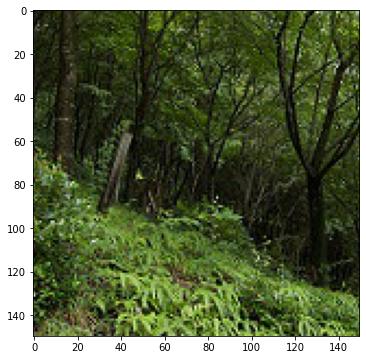

In [11]:
# Use of plt.imshow to view the first 'forest' image
plt.figure(figsize=(10,6))
plt.imshow(imread(first_forest_image))
plt.show()

## Preparation-Preprocessing

In [12]:
# Total number of images for each class in the train folder 
print(len(os.listdir(train_folder+'buildings')))
print(len(os.listdir(train_folder+'forest')))
print(len(os.listdir(train_folder+'glacier')))
print(len(os.listdir(train_folder+'mountain')))
print(len(os.listdir(train_folder+'sea')))
print(len(os.listdir(train_folder+'street')))

2191
2271
2404
2512
2274
2382


In [13]:
# Total number of images for each class in the test folder 
print(len(os.listdir(test_folder+'buildings')))
print(len(os.listdir(test_folder+'forest')))
print(len(os.listdir(test_folder+'glacier')))
print(len(os.listdir(test_folder+'mountain')))
print(len(os.listdir(test_folder+'sea')))
print(len(os.listdir(test_folder+'street')))

437
474
553
525
510
501


In [14]:
# Function to determine the average 'image.shape[0] and image.shape[1]' dimensions of the images for all train classes
# The image.shape[2] (color scheme) is 3 for all the train images
shape0=[]
shape1=[]
mean_s0=[]
mean_s1=[]
images=['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

for i in images:
    for x in os.listdir(train_folder+i):
        image=imread(train_folder+i+'\\'+ x)
        s0,s1=image.shape[:2]
        shape0.append(s0)
        shape1.append(s1)
        
    mean_s0.append(np.mean(shape0))
    mean_s1.append(np.mean(shape1))

In [15]:
# Mean value of images.shape[0]
mean_s0


[149.9881332724783,
 149.94060959211117,
 149.88625109233905,
 149.88025165280445,
 149.8932372124957,
 149.90872167592988]

In [16]:
# Mean value of images.shape[1]
mean_s1

[150.0, 150.0, 150.0, 150.0, 150.0, 150.0]

In [17]:
# Selected shape of the images that are to be passed in the deep learning model
single_im_shape=[150,150,3]

In [18]:
# Number of data points per image
d_point_per_image=150*150*3
d_point_per_image


67500

In [19]:
# Need to Rescale (1/pixel_val)
print(imread(first_build_image).min(),imread(first_build_image).max())
print(imread(first_forest_image).min(),imread(first_forest_image).max())


0 255
0 255


In [20]:
# Importing from tensorflow keras preprocessing the ImageDataGenerator as it provides real time image augmentation and 
# transformations to improve the efficiency of the training process
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_gen=ImageDataGenerator(
    #Image rotation (15 Deg.)
    rotation_range=0.15,
    # Image width/height shift by 10%
    width_shift_range=0.1,
    height_shift_range=0.1,
    #Image transformation/zoom (up to 15%)
    shear_range=0.15,
    zoom_range=0.15,
    # Image flipping (horizontally)
    horizontal_flip=True,
    # Fill missing values with the nearest pixel
    fill_mode='nearest',
    # Rescaling Factor-Image Normalization
    rescale=1/255)

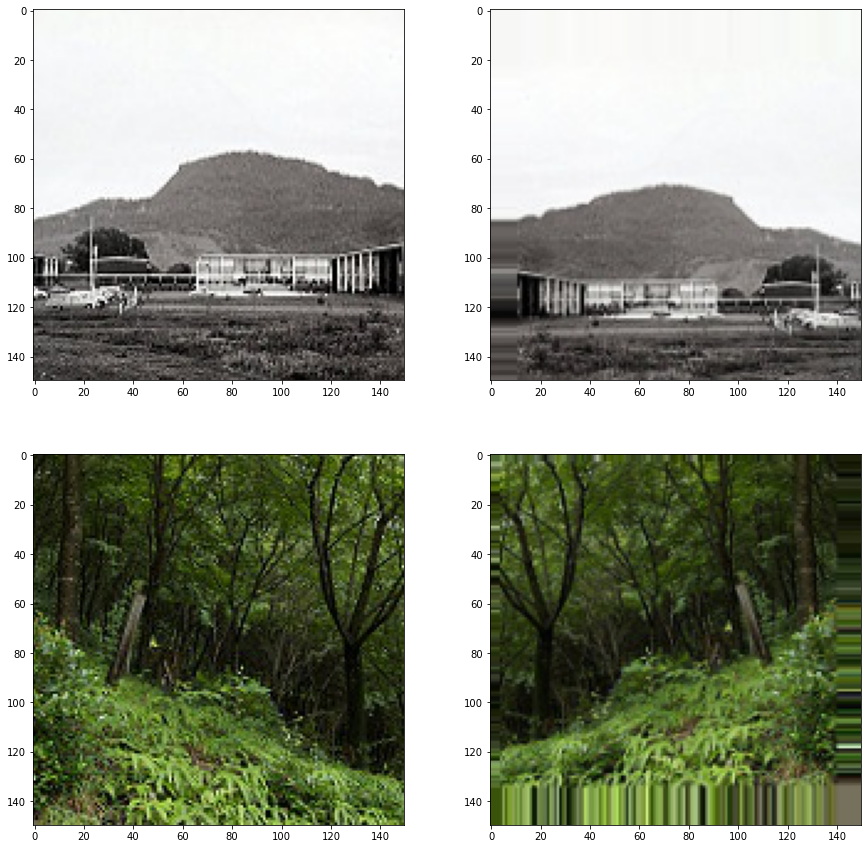

In [21]:
# Example of first 'building' and 'forest' images(left hand side) and their image generator transformation(right hand side)
firstbuildim=imread(first_build_image)
firstforestim=imread(first_forest_image)
fig,axs=plt.subplots(2,2,figsize=(15,15))
axs[0,0].imshow(firstbuildim)
axs[0,1].imshow(img_gen.random_transform(firstbuildim),)
axs[1,0].imshow(firstforestim)
axs[1,1].imshow(img_gen.random_transform(firstforestim))
plt.show()

In [22]:
# Tot. number of images on the train folder
img_gen.flow_from_directory(train_folder)

Found 14034 images belonging to 6 classes.


In [23]:
# Tot. number of images on the test folder
img_gen.flow_from_directory(test_folder)

Found 3000 images belonging to 6 classes.


## Creating the Deep Learning Model

In [24]:
# Importing the necessary libraries to create the convolutional deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [25]:
# Building the model
model=Sequential()
# Adding Convolution and Maxpool layers
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=single_im_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=single_im_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=single_im_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Flattening to convert the shape into one dimension (array)
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
# Dropout to randomly 'switch off' 30% of the neurons to avoid overfitting
model.add(Dropout(0.3))
# Use of 'softmax' activation function as number of classes>2
model.add(Dense(units=6,activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [26]:
# Summary of the deep learning model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [27]:
# Importing EarlyStopping to monitor the training process and stop if there is no decrease in the validation loss 
# after 1 epoch (patience=1)
from tensorflow.keras.callbacks import EarlyStopping
early_train_stop=EarlyStopping(monitor='val_loss',patience=1)

In [28]:
# Batch size
batch_size=16
# Train Image Generator
train_img_gen=img_gen.flow_from_directory(train_folder,target_size=single_im_shape[:2],
                                         color_mode='rgb',
                                         batch_size=batch_size,
                                         class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [29]:
# Test Image Generator
test_img_gen=img_gen.flow_from_directory(test_folder,target_size=single_im_shape[:2],
                                         color_mode='rgb',
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)

Found 3000 images belonging to 6 classes.


In [30]:
# Train folder classes indices
train_img_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

## Fitting the model & training performance

In [31]:
# Fitting the model to the train data
model_res=model.fit_generator(train_img_gen,epochs=7,validation_data=test_img_gen,callbacks=[early_train_stop])

Epoch 1/7
878/878 [==============================] - 401s 457ms/step - loss: 1.2529 - accuracy: 0.4950 - val_loss: 1.0060 - val_accuracy: 0.6010
Epoch 2/7
878/878 [==============================] - 393s 447ms/step - loss: 0.9238 - accuracy: 0.6530 - val_loss: 0.7033 - val_accuracy: 0.7457
Epoch 3/7
878/878 [==============================] - 361s 412ms/step - loss: 0.7874 - accuracy: 0.7169 - val_loss: 0.6440 - val_accuracy: 0.7613
Epoch 4/7
878/878 [==============================] - 371s 422ms/step - loss: 0.7094 - accuracy: 0.7459 - val_loss: 0.5485 - val_accuracy: 0.8000
Epoch 5/7
878/878 [==============================] - 359s 409ms/step - loss: 0.6602 - accuracy: 0.7648 - val_loss: 0.5330 - val_accuracy: 0.8137
Epoch 6/7
878/878 [==============================] - 376s 428ms/step - loss: 0.6111 - accuracy: 0.7864 - val_loss: 0.5084 - val_accuracy: 0.8070
Epoch 7/7
878/878 [==============================] - 363s 414ms/step - loss: 0.5800 - accuracy: 0.7962 - val_loss: 0.4851 - val_ac

In [32]:
# Training 'Loss','Accuracy','Validation Loss' & 'Validation Accuracy'
losses=pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.106371,0.566909,1.006016,0.601000
1,0.879608,0.672367,0.703347,0.745667
2,0.764164,0.721462,0.643968,0.761333
3,0.688415,0.754311,0.548461,0.800000
4,0.637001,0.775474,0.533032,0.813667
5,0.593494,0.791578,0.508396,0.807000
6,0.570590,0.797991,0.485106,0.828667


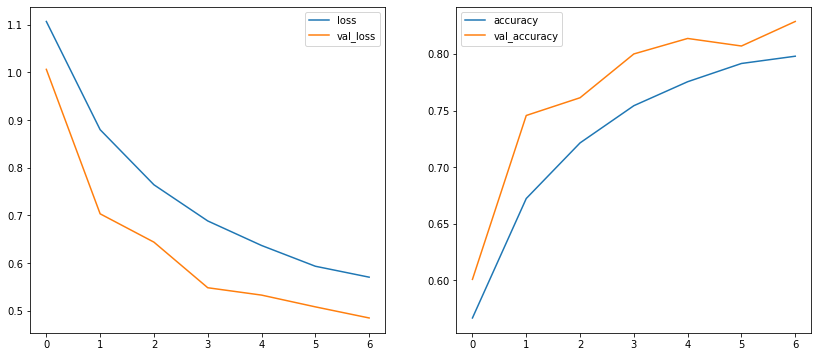

In [33]:
# Plots of 'Loss -Val.Loss' & 'Accuracy - Val. Accuracy'
fig,axs=plt.subplots(1,2,figsize=(14,6))
losses[['loss','val_loss']].plot(ax=axs[0])
losses[['accuracy','val_accuracy']].plot(ax=axs[1])
plt.show()


In [34]:
# Probability of predicting the correct classes
pred_prob=model.predict_generator(test_img_gen)
pred_prob

array([[9.0876007e-01, 1.6338176e-04, 1.6994443e-04, 3.6996641e-04,
        3.6251631e-03, 8.6911485e-02],
       [5.9304982e-01, 4.4521232e-05, 1.0113753e-05, 1.1838709e-05,
        3.3822405e-04, 4.0654549e-01],
       [8.4319890e-01, 5.1355437e-07, 6.9463072e-06, 2.6544235e-06,
        2.6733192e-04, 1.5652373e-01],
       ...,
       [1.9601011e-04, 2.5059056e-04, 2.3526992e-03, 6.2357479e-01,
        3.7330452e-01, 3.2141732e-04],
       [8.4939361e-01, 3.2702625e-05, 1.6555769e-04, 1.6563208e-04,
        1.2133907e-02, 1.3810858e-01],
       [2.4218298e-02, 6.0043219e-03, 7.7084522e-04, 7.3838992e-06,
        9.9257706e-04, 9.6800661e-01]], dtype=float32)

In [35]:
# Images with probability that belong to a certain class > 0.5
model_predictions=pred_prob>0.5
model_predictions

array([[ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       ...,
       [False, False, False,  True, False, False],
       [ True, False, False, False, False, False],
       [False, False, False, False, False,  True]])

In [36]:
# Total number of model predictions with probability than an image belongs to a certain class > 0.5
len(model_predictions[model_predictions==True])

2734

In [37]:
# Model class prediction for each test image
y_pred=model.predict_classes(test_img_gen)
y_pred

array([0, 0, 0, ..., 3, 0, 5], dtype=int64)

In [38]:
# Class of each test image
y_test=test_img_gen.classes
y_test

array([0, 0, 0, ..., 5, 5, 5])

In [39]:
# Importing the metrics (classification report & confusion matrix) from sklearn
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       437
           1       0.96      0.95      0.95       474
           2       0.87      0.68      0.76       553
           3       0.75      0.81      0.78       525
           4       0.76      0.90      0.82       510
           5       0.82      0.86      0.84       501

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



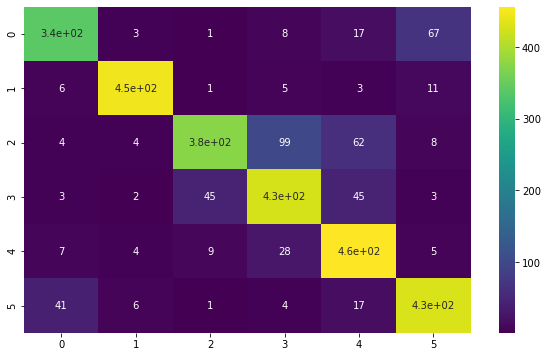

In [41]:
#Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='viridis')
plt.show()

## Test Data - Single Image Classification

In [42]:
# Selecting a random image from the 'Mountain' test folder
np.random.seed(1)
random_test_index=np.random.randint(0,len(os.listdir(test_folder+'Mountain\\')))
print('Index is: ',random_test_index)
test_img=os.listdir(test_folder+'Mountain')[random_test_index]
print('Image: ',test_img)


Index is:  37
Image:  20398.jpg


In [43]:
# Path of the randomly selected test sample
random_test_img=test_folder+ 'Mountain\\'+'20398.jpg'
print(random_test_img)

C:\Users\geoto\Desktop\Int_Img_Class\seg_test\Mountain\20398.jpg


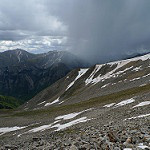

In [44]:
# Image of the randomnly selected test sample
from tensorflow.keras.preprocessing import image

test_image=image.load_img(random_test_img,target_size=single_im_shape)
test_image

In [45]:
# Test Image to array conversion
test_image_array=image.img_to_array(test_image)
test_image_array.max()

255.0

In [46]:
# Rescaling the test image
scaled_test_image=test_image_array/255
scaled_test_image.max()

1.0

In [47]:
# Shape of the scaled test image
scaled_test_image.shape

(150, 150, 3)

In [48]:
# Reshaping it so as to be passed as input to the model
scaled_test_image=np.expand_dims(scaled_test_image,axis=0)
scaled_test_image.shape

(1, 150, 150, 3)

In [49]:
# Test Image Class prediction
test_image_prediction=model.predict_classes(scaled_test_image)
print('Test image predicted class:',int(test_image_prediction))

Test image predicted class: 3


In [50]:
# Model predicted that it belongs to class 3 (Mountain image), which is correct
print(train_img_gen.class_indices)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


## Prediction Data -  Image Classification

### A) - First Random Image from Pred_Folder

In [51]:
# Randomly selected pred folder sample
np.random.seed(1)
random_index=np.random.randint(0,len(os.listdir(pred_folder+'Prediction_Images')))
print('Index is: ',random_index)
pred_img=os.listdir(pred_folder+'Prediction_Images')[random_index]
print('Image: ',pred_img)


Index is:  5157
Image:  375.jpg


In [52]:
# Path of the randomly selected pred folder sample
random_pred_img=pred_folder+ 'Prediction_Images\\'+'375.jpg'
print(random_pred_img)

C:\Users\geoto\Desktop\Int_Img_Class\seg_pred\Prediction_Images\375.jpg


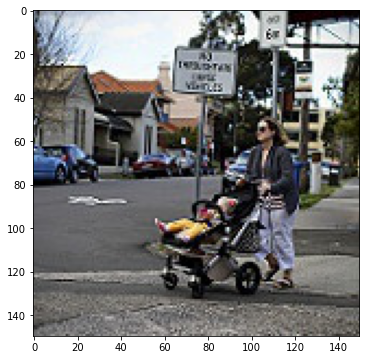

In [53]:
# Image of the randomly selected pred folder sample
plt.figure(figsize=(10,6))
plt.imshow(imread(random_pred_img))
plt.show()

In [54]:
# Rescaling the image
scaled_pred_img=imread(random_pred_img)/255
scaled_pred_img

array([[[0.56862745, 0.58431373, 0.68235294],
        [0.41568627, 0.42352941, 0.48235294],
        [0.11764706, 0.10980392, 0.12941176],
        ...,
        [0.03137255, 0.        , 0.00784314],
        [0.02352941, 0.        , 0.        ],
        [0.01960784, 0.        , 0.        ]],

       [[0.5372549 , 0.56470588, 0.63921569],
        [0.28627451, 0.29411765, 0.34509804],
        [0.1372549 , 0.13333333, 0.15294118],
        ...,
        [0.04313725, 0.01960784, 0.01960784],
        [0.04313725, 0.01960784, 0.01960784],
        [0.01568627, 0.        , 0.        ]],

       [[0.41176471, 0.44705882, 0.50588235],
        [0.37254902, 0.4       , 0.43921569],
        [0.21568627, 0.23529412, 0.25098039],
        ...,
        [0.03137255, 0.01568627, 0.01960784],
        [0.01960784, 0.01176471, 0.02352941],
        [0.03921569, 0.03137255, 0.05098039]],

       ...,

       [[0.34901961, 0.34901961, 0.34901961],
        [0.4       , 0.4       , 0.4       ],
        [0.44313725, 0

In [55]:
# Shape of the scaled image
scaled_pred_img.shape

(150, 150, 3)

In [70]:
# Image Class Prediction
new_pred=model.predict_classes(np.expand_dims(scaled_pred_img,axis=0))
print(train_img_gen.class_indices)
print('Pred image predicted class:',int(new_pred))

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Pred image predicted class: 5


### B) - Second Random Image from Pred_Folder

In [57]:
# Randomly selected pred folder sample
np.random.seed(100)
random_index2=np.random.randint(0,len(os.listdir(pred_folder+'Prediction_Images')))
print('Index: ',random_index2)
pred_img2=os.listdir(pred_folder+'Prediction_Images')[random_index2]
print('Image: ',pred_img2)




Index:  5640
Image:  4991.jpg


In [58]:
# Path of the randomly selected pred folder sample
random_pred_img2=pred_folder+ 'Prediction_Images\\'+'4991.jpg'
print(random_pred_img2)

C:\Users\geoto\Desktop\Int_Img_Class\seg_pred\Prediction_Images\4991.jpg


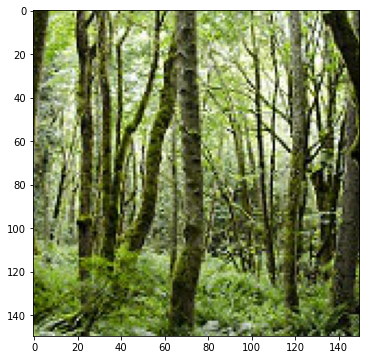

In [59]:
# Image of the randomly selected pred folder sample
plt.figure(figsize=(10,6))
plt.imshow(imread(random_pred_img2))
plt.show()

In [60]:
# Rescaling the image
scaled_pred_img2=imread(random_pred_img2)/255

In [71]:
# Image class prediction
sec_new_pred=model.predict_classes(np.expand_dims(scaled_pred_img2,axis=0))
print(train_img_gen.class_indices)
print('Pred image predicted class:',int(sec_new_pred))

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Pred image predicted class: 1


### C) - Class Prediction of all images - Pred_Folder

In [62]:
# Prediction folder images
pred_samples=os.listdir(pred_folder+'Prediction_Images')
#First 10 images
pred_samples[:10]

['10004.jpg',
 '10005.jpg',
 '10012.jpg',
 '10013.jpg',
 '10017.jpg',
 '10021.jpg',
 '1003.jpg',
 '10034.jpg',
 '10038.jpg',
 '10040.jpg']

In [63]:
# Due to the fact that the model has been trained with image shape (150,150,3),the following functions selects the images
# from the prediction folder that are of the same shape

for x in pred_samples:
    
    image_pred = imread(pred_folder+'\\Prediction_Images'+'\\'+x)
    s0,s1 = image_pred.shape[:2]
    if s0!=150 or s1!=150:
        pred_samples.remove(x)
        

In [64]:
len(pred_samples)

7288

In [65]:
# Rescaling the images
scaled_pred_samples=[]
for i in pred_samples:
    pred_im=imread(pred_folder+ 'Prediction_Images\\'+i)/255
    scaled_pred_samples.append(pred_im)
    

In [66]:
# the scaled first image of the prediction folder
scaled_pred_samples[0]

array([[[0.68627451, 0.59607843, 0.47058824],
        [0.79607843, 0.71372549, 0.59215686],
        [0.79215686, 0.70196078, 0.56862745],
        ...,
        [0.94901961, 0.70196078, 0.32156863],
        [0.88627451, 0.60784314, 0.28627451],
        [0.9254902 , 0.63529412, 0.34901961]],

       [[0.77254902, 0.6745098 , 0.55294118],
        [0.84313725, 0.75294118, 0.63137255],
        [0.81960784, 0.72156863, 0.6       ],
        ...,
        [0.92941176, 0.65490196, 0.27058824],
        [0.95294118, 0.64313725, 0.28235294],
        [0.92156863, 0.58431373, 0.24313725]],

       [[0.76470588, 0.66666667, 0.54509804],
        [0.78823529, 0.69411765, 0.58431373],
        [0.83921569, 0.74901961, 0.62745098],
        ...,
        [0.9372549 , 0.65098039, 0.25098039],
        [0.94901961, 0.62352941, 0.22352941],
        [0.94901961, 0.6       , 0.2       ]],

       ...,

       [[1.        , 0.92941176, 0.78823529],
        [0.96078431, 0.88627451, 0.72156863],
        [1.        , 0

In [67]:
# Shape of the scaled_pred_samples
scaled_pred_samples[0].shape

(150, 150, 3)

In [68]:
# Function to predict all images of the prediction folder
model_outputs=[]
for i in range(len(scaled_pred_samples)):
    prediction=model.predict_classes(scaled_pred_samples[i].reshape(1,150,150,3))[0]
    model_outputs.append(prediction)
model_outputs

[5,
 3,
 5,
 3,
 3,
 1,
 4,
 2,
 4,
 5,
 4,
 5,
 4,
 0,
 0,
 2,
 1,
 1,
 3,
 4,
 0,
 5,
 5,
 5,
 2,
 0,
 1,
 3,
 2,
 3,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 5,
 2,
 4,
 4,
 1,
 3,
 2,
 5,
 3,
 0,
 0,
 1,
 0,
 1,
 4,
 2,
 5,
 0,
 5,
 0,
 1,
 3,
 4,
 1,
 3,
 2,
 5,
 1,
 3,
 3,
 1,
 4,
 5,
 1,
 1,
 3,
 4,
 2,
 2,
 5,
 3,
 3,
 1,
 1,
 3,
 0,
 1,
 3,
 0,
 3,
 0,
 2,
 1,
 1,
 0,
 4,
 3,
 4,
 5,
 4,
 5,
 0,
 3,
 1,
 3,
 4,
 5,
 1,
 5,
 4,
 0,
 1,
 0,
 0,
 3,
 5,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 5,
 0,
 5,
 2,
 0,
 1,
 3,
 3,
 2,
 1,
 3,
 0,
 2,
 1,
 1,
 0,
 1,
 4,
 5,
 4,
 4,
 3,
 0,
 4,
 1,
 4,
 3,
 3,
 5,
 5,
 2,
 3,
 2,
 5,
 1,
 1,
 1,
 0,
 2,
 5,
 2,
 3,
 3,
 4,
 1,
 3,
 2,
 5,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 5,
 5,
 3,
 0,
 2,
 4,
 4,
 1,
 4,
 1,
 4,
 4,
 3,
 2,
 5,
 4,
 4,
 4,
 1,
 3,
 2,
 5,
 3,
 0,
 3,
 2,
 0,
 1,
 3,
 4,
 4,
 3,
 1,
 1,
 0,
 2,
 3,
 4,
 4,
 5,
 4,
 1,
 0,
 1,
 5,
 4,
 0,
 5,
 5,
 1,
 5,
 1,
 2,
 2,
 5,
 1,
 3,
 5,
 0,
 3,
 0,
 3,
 2,
 5,
 0,
 4,
 5,
 2,
 1,
 5,
 2,


In [69]:
# Tot. number of predicted classes
len(model_outputs)

7288